<a href="https://colab.research.google.com/github/justalge/another_python_tutorial/blob/main/week5/Lecture_9_callable_context_managers_slots_ABC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Callables and Callable Instances

There will be hardly any Python user who hasn't stumbled upon exceptions like 'dict' object is not callable or 'int' object is not callable. After a while they find out the reason. They used parentheses (round bracket) in situation where they shouldn't have done it. Expressions like f(x), gcd(x, y) or sin(3.4) are usually used for function calls. The question is, why do we get the message 'dict' object is not callable if we write d('a'), if d is a dictionary? Why doesn't it say 'dict' object is not a function? First of all, when we invoke a function in Python, we also say we 'call the function'. Secondly, there are objects in Python, which are 'called' like functions but are not functions strictly speaking. There are 'lambda functions', which are defined in a different way. It is also possible to define classes, where the instances are callable like 'regular' functions. This will be achieved by adding another magic method the \_\_call__ method.

![](https://www.python-course.eu/images/robot_james_calling.webp)

Before we will come to the \_\_call__ method, we have to know what a callable is. In general, a "callable" is an object that can be called like a function and behaves like one. All functions are also callables. Python provides a function with the name callable. With the help of this funciton we can determine whether an object is callable or not. The function callable returns a Boolean truth value which indicates whether the object passed as an argument can be called like a function or not. In addition to functions, we have already seen another form of callables: classes

In [ ]:
def the_answer(question):
    return 42

print("the_answer: ", callable(the_answer))

the_answer:  True


The \_\_call__ method can be used to turn the instances of the class into callables. Functions are callable objects. A callable object is an object which can be used and behaves like a function but might not be a function. By using the \_\_call__ method it is possible to define classes in a way that the instances will be callable objects. The \_\_call__ method is called, if the instance is called "like a function", i.e. using brackets. The following class definition is the simplest possible way to define a class with a \_\_call__ method. Whenever we create an instance of the class, we get a callable

In [ ]:
class FoodSupply:
    
    def __init__(self, *incredients):
        self.incredients = incredients
    
    def __call__(self):
        result = " ".join(self.incredients) + " plus delicious spam!"
        return result
    
f = FoodSupply("fish", "rice")
f()

'fish rice plus delicious spam!'

Now, we define a class with the name TriangleArea. This class has only one method, which is the \_\_call__ method. The \_\_call__ method calculates the area of an arbitrary triangle, if the length of the three sides are given.

In [ ]:
class TriangleArea:
    
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        return result

area = TriangleArea()

print(area(3, 4, 5))

6.0



This program returns 6.0. This class is not very exciting, even though we can create an arbitrary number of instances where each instance just executes an unaltered \_\_call__ function of the TrianlgeClass. We cannot pass parameters to the instanciation and the \_\_call__ of each instance returns the value of the area of the triangle. So each instance behaves like the area function.

After the two very didactic and not very practical examples, we want to demonstrate a more practical example with the following. We define a class that can be used to define linear equations:

In [ ]:
class StraightLines():
    
    def __init__(self, m, c):
        self.slope = m
        self.y_intercept = c
        
    def __call__(self, x):
        return self.slope * x + self.y_intercept
    
line = StraightLines(0.4, 3)

for x in range(-5, 6):
    print(x, line(x))

-5 1.0
-4 1.4
-3 1.7999999999999998
-2 2.2
-1 2.6
0 3.0
1 3.4
2 3.8
3 4.2
4 4.6
5 5.0


We will use this class now to create some straight lines and visualize them with matplotlib:

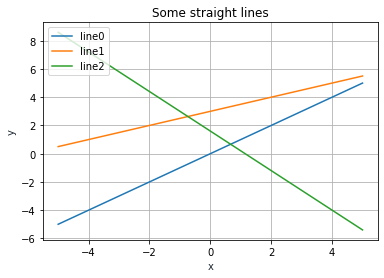

In [ ]:
lines = []
lines.append(StraightLines(1, 0))
lines.append(StraightLines(0.5, 3))
lines.append(StraightLines(-1.4, 1.6))

import matplotlib.pyplot as plt
import numpy as np
X = np.linspace(-5,5,100)
for index, line in enumerate(lines):
    line = np.vectorize(line)
    plt.plot(X, line(X), label='line' + str(index))

plt.title('Some straight lines')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Our next example is also exciting. The class FuzzyTriangleArea defines a different \_\_call__ method which implements a fuzzy behaviour in the calculations of the area. The result should be correct with a likelihood of p, e.g. 0.8. If the result is not correct the result will be in a range of ± v %. e.g. 0.1

In [ ]:
import random

class FuzzyTriangleArea:
    
    def __init__(self, p=0.8, v=0.1):
        self.p, self.v = p, v
        
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        if random.random() <= self.p:
            return result
        else:
            return random.uniform(result-self.v, 
                                  result+self.v)
        
area1 = FuzzyTriangleArea()
area2 = FuzzyTriangleArea(0.5, 0.2)
for i in range(12):
    print(f"{area1(3, 4, 5):4.3f}, {area2(3, 4, 5):4.2f}")

6.000, 6.06
6.043, 6.00
5.947, 5.85
6.000, 6.16
5.931, 5.82
6.000, 6.00
5.909, 6.19
6.000, 6.15
6.000, 5.93
6.000, 6.00
6.000, 6.00
6.000, 6.00


Beware that this output differs with every call! We can see the in most cases we get the right value for the area but sometimes not.

We can create many different instances of the previous class. Each of these behaves like an area function, which returns a value for the area, which may or may not be correct, depending on the instantiation parameters p and v. We can see those instances as experts (expert functions) which return in most cases the correct answer, if we use p values close to 1. If the value v is close to zero, the error will be small, if at all. The next task would be merging such experts, let's call them exp1, exp2, ..., expn to get an improved result. We can perform a vote on the results, i.e. we will return the value which is most often occuring, the correct value. Alternatively, we can calculate the arithmetic mean. We will implement both possibilities in our class FuzzyTriangleArea:

![](https://www.python-course.eu/images/merger_callable__call___800w.webp)

In [ ]:
from random import uniform, random
from collections import Counter

class FuzzyTriangleArea:

    def __init__(self, p=0.8, v=0.1):
        self.p, self.v = p, v
        
    def __call__(self, a, b, c):
        p = (a + b + c) / 2
        result = (p * (p - a) * (p - b) * (p - c)) ** 0.5
        if random() <= self.p:
            return result
        else:
            return uniform(result-self.v, 
                                  result+self.v)
     
   
class MergeExperts:
    
    def __init__(self, mode, *experts):
        self.mode, self.experts = mode, experts
        
    def __call__(self, a, b, c):
        results= [exp(a, b, c) for exp in self.experts]
        if self.mode == "vote":
            c = Counter(results)
            return c.most_common(1)[0][0]
        elif self.mode == "mean":
            return sum(results) / len(results)

rvalues = [(uniform(0.7, 0.9), uniform(0.05, 0.2)) for _ in range(20)]
experts = [FuzzyTriangleArea(p, v) for p, v in rvalues]
merger1 = MergeExperts("vote", *experts)
print(merger1(3, 4, 5))
merger2 = MergeExperts("mean", *experts)
print(merger2(3, 4, 5))

6.0
5.994768928215306


## Big example. Polinomials
If you have been to highschool, you will have encountered the terms polynomial and polynomial function. This chapter of our Python tutorial is completely on polynomials, i.e. we will define a class to define polynomials. The following is an example of a polynomial with the degree 4:

$p(x) = x^4 - 4 \cdot x^2 + 3 \cdot x$

You will find out that there are lots of similarities to integers. We will define various arithmetic operations for polynomials in our class, like addition, subtraction, multiplication and division. Our polynomial class will also provide means to calculate the derivation and the integral of polynomials. We will not miss out on plotting polynomials.
There is a lot of beauty in polynomials and above all in how they can be implemented as a Python class.

#### Short Mathematical Introduction

We will only deal with polynomial in a single indeterminate (also called variable) x. A general form of a polynomial in a single indeterminate looks like this:

$$a_n \cdot x^n + a_{n-1} \cdot x^{n-1} + \ldots + a_2 \cdot x^2 + a_1 \cdot x + a_0$$

where $a_0, a_1, ... a_n$ are the constants - non-negative integers - and $x$ is the indeterminate or variable. The term "indeterminate" means that $x$ represents no particular value, but any value may be substituted for it.

This expression is usually written with the summation operator:

$$\sum_{k=0}^{n} a_k \cdot x^k = a_n \cdot x^n + a_{n-1} \cdot x^{n-1} + \ldots + a_2 \cdot x^2 + a_1 \cdot x + a_0$$

A polynomial function is a function that can be defined by evaluating a polynomial. A function f of one argument can be defined as:

$$f(x) = \sum_{k=0}^{n} a_k \cdot x^k$$

#### Polynomial Functions with Python

It's easy to implement polynomial functions in Python. As an example we define the polynomial function given in the introduction of this chapter, i.e. $p(x) = x^4 - 4 \cdot x^2 + 3 \cdot x$

The Python code for this polynomial function looks like this:


In [ ]:
def p(x):
    return x**4 - 4*x**2 + 3*x

We can call this function like any other function:

In [ ]:
for x in [-1, 0, 2, 3.4]:
    print(x, p(x))

-1 -6
0 0
2 6
3.4 97.59359999999998


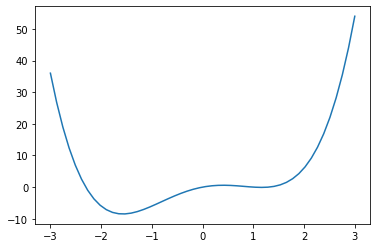

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-3, 3, 50, endpoint=True)
F = p(X)
plt.plot(X,F)

plt.show()

#### Polynomial Class

We will define now a class for polynomial functions. A polynomial is uniquely determined by its coefficients. This means, an instance of our polynomial class needs a list or tuple to define the coefficients

In [ ]:
class Polynomial:
    
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
        """
        return "Polynomial" + str(tuple(self.coefficients))

    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

In [ ]:
polys = [Polynomial(1, 0, -4, 3, 0),
         Polynomial(2, 0),
         Polynomial(4, 1, -1),
         Polynomial(3, 0, -5, 2, 7),
         Polynomial(-42)]

# output suitable for usage in LaTeX:
for count, poly in enumerate(polys):
    print(f"$p_{count} = {str(poly)}$")

$p_0 = x^4-4x^2+3x$
$p_1 = 2x$
$p_2 = 4x^2+x-1$
$p_3 = 3x^4-5x^2+2x+7$
$p_4 = -42$


If we use this in LaTeX it will look like this:

$p_0 = x^4-4x^2+3x$

$p_1 = 2x$

. . .

So far, we have defined polynomials, but what we actually need are polynomial functions. For this purpose, we turn instances of the Polynomial class into callables by defining the call method:

In [ ]:
class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
    
    # The __repr__ and __str__ method can be included here,
    # but is not necessary for the immediately following code
            
    def __call__(self, x):    
        res = 0
        for index, coeff in enumerate(self.coefficients[::-1]):
            res += coeff * x** index
        return res 

It is possible now to call an instance of our class like a function. We call it with an argument and the instance, - which is a callable, - behaves like a polynomial function:

In [ ]:
p = Polynomial(3, 0, -5, 2, 1)
print(p)

for x in range(-3, 3):
    print(x, p(x))

-3 193
-2 25
-1 -3
0 1
1 1
2 33


Just for fun, let us plot the previously defined function:

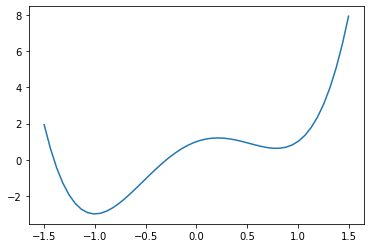

In [ ]:
import matplotlib.pyplot as plt

X = np.linspace(-1.5, 1.5, 50, endpoint=True)
F = p(X)
plt.plot(X, F)

plt.show()

Before we further refine our class, let us use a numerically more efficient variant for the calculation of polynomials. We will use this algorithm in our \_\_call__ method.

Every polynomial $f(x) = \sum_{k=0}^{n} a_k \cdot x^k$ can be also written in the form $f(x) = (a_n x + x_{n-1})x + \cdot + a_1)x + a_0$

We rewrite our class definition (only change \_\_call__):

In [ ]:
class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
         
    # The __repr__ and __str__ method can be included here,
    # but is not necessary for the immediately following code
    
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 

It is possible to define addition and subtractions for polynomials. All we have to do is to add or subtract the coefficients with the same exponents from both polynomials.

If we have polynomial functions $f(x) = \sum_{k=0}^{n} a_k \cdot x^k$ and $g(x) = \sum_{k=0}^{n} b_k \cdot x^k$, the addition is defined as

$$(f+g)(x) = \sum_{k=0}^{n} (a_k + b_k) \cdot x^k$$

and correspondingly subtraction is defined as

$$(f-g)(x) = \sum_{k=0}^{n} (a_k - b_k) \cdot x^k$$

Before we can add the methods in \_\_add__ and \_\_sub__, which are necessary for addition and subtraction, we add a generator zip_longest(). It works similar to zip for two parameters, but it does not stop if one of the iterators is exhausted but uses "fillvalue" instead:

## (Attention! Example with generator)

In [ ]:
def zip_longest(iter1, iter2, fillvalue=None):

    for i in range(max(len(iter1), len(iter2))):
        if i >= len(iter1):
            yield (fillvalue, iter2[i])
        elif i >= len(iter2):
            yield (iter1[i], fillvalue)
        else:
            yield (iter1[i], iter2[i])
        i += 1

p1 = (2,)
p2 = (-1, 4, 5)
for x in zip_longest(p1, p2, fillvalue=0):
    print(x)

(2, -1)
(0, 4)
(0, 5)


(More about generators: [generators vs iterators](https://stackoverflow.com/questions/2776829/difference-between-pythons-generators-and-iterators), [what does keyword 'yeild' in python](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do/31042491#31042491), [method 'send' of generators](https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do/31042491#31042491))

The generator zip_longest is from itertools. We get it from there. zip_longest takes and arbitrary number of iterables and a keyword parameter fillvalue. It creates an iterator that aggregates elements from each of the iterables. If the iterables are of uneven length, missing values are filled-in with fillvalue. Iteration continues until the longest iterable is exhausted.

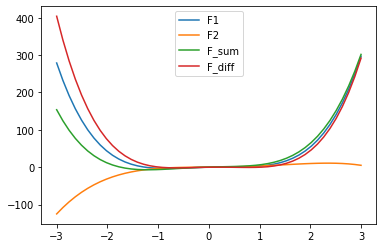

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest

class Polynomial:
    
    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list
     
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        return "Polynomial" + str(self.coefficients)
            
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 
    
    def degree(self):
        return len(self.coefficients)   
            
    def __add__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [sum(t) for t in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    
    def __sub__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        
        res = [t1-t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res[::-1])
    

            
p1 = Polynomial(4, 0, -4, 3, 0)
p2 = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)

p_sum = p1 + p2
p_diff = p1 - p2

X = np.linspace(-3, 3, 50, endpoint=True)
F1 = p1(X)
F2 = p2(X)
F_sum = p_sum(X)
F_diff = p_diff(X)
plt.plot(X, F1, label="F1")
plt.plot(X, F2, label="F2")
plt.plot(X, F_sum, label="F_sum")
plt.plot(X, F_diff, label="F_diff")

plt.legend()
plt.show()

It is incredibly easy to add differentiation to our class. Mathematically, it is defined as $f'(x) =  \sum_{k=0}^{n} k \cdot a_k \cdot x^{k-1}$ if $f(x) =    \sum_{k=0}^{n} a_k \cdot x^k$

This can be easily implemented in our method 'derivative':

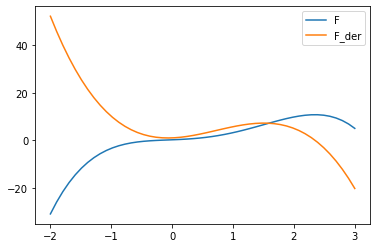

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class Polynomial:
 

    def __init__(self, *coefficients):
        """ input: coefficients are in the form a_n, ...a_1, a_0 
        """
        self.coefficients = list(coefficients) # tuple is turned into a list

        
    def __repr__(self):
        """
        method to return the canonical string representation 
        of a polynomial.
   
        """
        return "Polynomial" + str(self.coefficients)

    
    def __call__(self, x):    
        res = 0
        for coeff in self.coefficients:
            res = res * x + coeff
        return res 

    
    def degree(self):
        return len(self.coefficients)   

    
    def __add__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        res = [sum(t) for t in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res)

    
    def __sub__(self, other):
        c1 = self.coefficients[::-1]
        c2 = other.coefficients[::-1]
        
        res = [t1-t2 for t1, t2 in zip_longest(c1, c2, fillvalue=0)]
        return Polynomial(*res)
 

    def derivative(self):
        derived_coeffs = []
        exponent = len(self.coefficients) - 1
        for i in range(len(self.coefficients)-1):
            derived_coeffs.append(self.coefficients[i] * exponent)
            exponent -= 1
        return Polynomial(*derived_coeffs)

    
    def __str__(self):
        
        def x_expr(degree):
            if degree == 0:
                res = ""
            elif degree == 1:
                res = "x"
            else:
                res = "x^"+str(degree)
            return res

        degree = len(self.coefficients) - 1
        res = ""

        for i in range(0, degree+1):
            coeff = self.coefficients[i]
            # nothing has to be done if coeff is 0:
            if abs(coeff) == 1 and i < degree:
                # 1 in front of x shouldn't occur, e.g. x instead of 1x
                # but we need the plus or minus sign:
                res += f"{'+' if coeff>0 else '-'}{x_expr(degree-i)}"  
            elif coeff != 0:
                res += f"{coeff:+g}{x_expr(degree-i)}" 

        return res.lstrip('+')    # removing leading '+'

            
p = Polynomial(-0.8, 2.3, 0.5, 1, 0.2)

p_der = p.derivative()

X = np.linspace(-2, 3, 50, endpoint=True)

F = p(X)
F_derivative = p_der(X)
plt.plot(X, F, label="F")
plt.plot(X, F_derivative, label="F_der")

plt.legend()
plt.show()

Playing around a little bit:

In [ ]:
p = Polynomial(1, 2, -3, 4, -55)

p2 = Polynomial(1, 2, 3)

p_der = p.derivative()

print(p)
print(p_der)
print(p2)

p3 = p + p2

print(p3)

x^4+2x^3-3x^2+4x-55
4x^3+6x^2-6x+4
x^2+2x+3
-52x^4+6x^3-2x^2+2x+1


## Context Manager in Python

**Managing Resources**: In any programming language, the usage of resources like file operations or database connections is very common. But these resources are limited in supply. Therefore, the main problem lies in making sure to release these resources after usage. If they are not released then it will lead to resource leakage and may cause the system to either slow down or crash. It would be very helpful if user have a mechanism for the automatic setup and teardown of resources.In Python, it can be achieved by the usage of context managers which facilitate the proper handling of resources. The most common way of performing file operations is by using the with keyword as shown below:

```python
# Python program showing 
# a use of with keyword
  
with open("test.txt") as f:   
    data = f.read()
```

Let’s take the example of file management. When a file is opened, a file descriptor is consumed which is a limited resource. Only a certain number of files can be opened by a process at a time. The following program demonstrates it:

In [ ]:
file_descriptors = []
for x in range(10000000):
    file_descriptors.append(open(f'test_{x}.txt', 'w'))

OSError: ignored

An error message saying that too many files are open. The above example is a case of file descriptor leakage. It happens because there are too many open files and they are not closed. There might be chances where a programmer may forget to close an opened file.

**Managing Resources using context manager**: Suppose a block of code raises an exception or if it has a complex algorithm with multiple return paths, it becomes cumbersome to close a file in all the places.
Generally in other languages when working with files try-except-finally is used to ensure that the file resource is closed after usage even if there is an exception.Python provides an easy way to manage resources: Context Managers. The with keyword is used. When it gets evaluated it should result in an object that performs context management. Context managers can be written using classes or functions(with decorators)

#### Creating a Context Manager

When creating context managers using classes, user need to ensure that the class has the methods: \_\_enter__() and \_\_exit__(). The \_\_enter__() returns the resource that needs to be managed and the \_\_exit__() returns `True` if the caught exception should be intercepted. If \_\_exit__ doesn't return anything it is the same if it returns `None` and this `None` is casted to `False`. This means that raised exception should not be intercepted and it is passed further (which causes interrupt of a program):

In [ ]:
# First, lets create a simple class called ContextManager to understand the
# basic structure of creating context managers using classes, as shown below:

# Python program creating a
# context manager
  
class ContextManager():
    def __init__(self):
        print('init method called')
          
    def __enter__(self):
        print('enter method called')
        return self
      
    def __exit__(self, exc_type, exc_value, exc_traceback):
        print('exit method called without exception')
        return True
  
  
with ContextManager() as manager:
    raise Exception
    print('with statement block')

init method called
enter method called
exit method called without exception


In [ ]:
class ContextManager():
    def __init__(self):
        print('init method called')
          
    def __enter__(self):
        print('enter method called')
        return self
      
    def __exit__(self, exc_type, exc_value, exc_traceback):
        print('exit method called WITH exception')
  
  
with ContextManager() as manager:
    raise Exception
    print('with statement block')

init method called
enter method called
exit method called WITH exception


Exception: ignored

In this case a ContextManager object is created. This is assigned to the variable after the as keyword i.e manager. On running the above program, the following get executed in sequence:

* A FileManager object is created with test.txt as the filename and w(write) as the mode when \_\_init__ method is executed
* The \_\_enter__ method opens the test.txt file in write mode(setup operation) and returns the FileManager object to variable f
* statement body (code inside the with block): the text is written into the file for example
* \_\_exit__()\[the parameters in this method are used to manage exceptions]: the \_\_exit__ method takes care of closing the file on exiting the with block (teardown operation)

#### File management using context manager

Let’s apply the above concept to create a class that helps in file resource management.The FileManager class helps in opening a file, writing/reading contents and then closing it

In [ ]:
# Python program showing
# file management using 
# context manager
  
class FileManager():
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode
        self.file = None
          
    def __enter__(self):
        self.file = open(self.filename, self.mode)
        return self.file
      
    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.file.close()
  
# loading a file 
with FileManager('test.txt', 'w') as f:
    f.write('Test')
  
print(f.closed)

OSError: ignored

Do you remember the cell with `for x in range(10000000):`?

Time to restart kernel

In [ ]:
# Python program showing
# file management using 
# context manager
  
class FileManager():
    def __init__(self, filename, mode):
        self.filename = filename
        self.mode = mode
        self.file = None
          
    def __enter__(self):
        self.file = open(self.filename, self.mode)
        return self.file
      
    def __exit__(self, exc_type, exc_value, exc_traceback):
        self.file.close()
  
# loading a file 
with FileManager('test.txt', 'w') as f:
    f.write('Test')
  
print(f.closed)

True


[Example](https://www.geeksforgeeks.org/context-manager-in-python/) with database connection management using context manager and with statement (in the bottom of a page)

## Slots

The attributes of objects are stored in a dictionary \_\_dict__. Like any other dictionary, a dictionary used for attribute storage doesn't have a fixed number of elements. In other words, you can add elements to dictionaries after they are defined, as we have seen in our chapter on dictionaries. This is the reason, why you can dynamically add attributes to objects of classes that we have created so far:

In [ ]:
class A(object):
    pass
 
a = A()
a.x = 66
a.y = "dynamically created attribute"

The dictionary containing the attributes of "a" can be accessed like this:

In [ ]:
a.__dict__

{'x': 66, 'y': 'dynamically created attribute'}

You might have wondered that you can dynamically add attributes to the classes, we have defined so far, but that you can't do this with built-in classes like 'int', or 'list':

In [ ]:
x = []
x.a = "not possible to do it"

AttributeError: ignored

If we generated a class in which usually only a few instances are needed in a program, - such as the Function class, - the advantages outweigh the disadvantages. The additional storage space for the dictionary brings us significant advantages for the design of our software. However, as soon as a high number of instances of a class must be generated in a program, the cost-benefit ratio can quickly reverse. The additionally required storage space can adversely affect or even prevent the execution of the program.

Python's slots are a nice way to work around this space consumption problem. Instead of having a dynamic dict dictionary that allows adding attributes to objects dynamically, slots provide a static structure which prohibits additions after the creation of an instance.

When we design a class, we can use slots to prevent the dynamic creation of attributes. To define slots, you have to define a list with the name \_\_slots__. The list has to contain all the attributes, you want to use. Anything not in this list cannot be used as an attribute. We demonstrate this in the following class, in which the \_\_slots__ list contains only the name for an attribute val:

In [ ]:
class S(object):

    # __slots__ = ['val']

    def __init__(self, v):
        self.val = v


x = S(42)
print(x.val)

x.new = "not possible"

42


We mentioned in the beginning that slots are preventing a waste of space with objects. Since Python 3.3 this advantage is not as impressive any more. With Python 3.3 Key-Sharing Dictionaries are used for the storage of objects. The attributes of the instances are capable of sharing part of their internal storage between each other, i.e. the part which stores the keys and their corresponding hashes. This helps reducing the memory consumption of programs, which create many instances of non-builtin types

[More about slots](https://towardsdatascience.com/understand-slots-in-python-e3081ef5196d)

## Abstract Classes

Abstract classes are classes that contain one or more abstract methods. An abstract method is a method that is declared, but contains no implementation. Abstract classes cannot be instantiated, and require subclasses to provide implementations for the abstract methods.

You can see this in the following examples:

In [ ]:
class AbstractClass:
    
    def do_something(self):
        pass
    
    
class B(AbstractClass):
    pass

a = AbstractClass()
b = B()

If we start this program, we see that this is not an abstract class, because:

* we can instantiate an instance from
* we are not required to implement do_something in the class defintition of B

Our example implemented a case of simple inheritance which has nothing to do with an abstract class. In fact, Python on its own doesn't provide abstract classes. Yet, Python comes with a module which provides the infrastructure for defining Abstract Base Classes (ABCs). This module is called - for obvious reasons - abc.

The following Python code uses the abc module and defines an abstract base class:

In [ ]:
from abc import ABC, abstractmethod
 
class AbstractClassExample(ABC):
 
    def __init__(self, value):
        self.value = value
        super().__init__()
    
    @abstractmethod
    def do_something(self):
        pass

We will define now a subclass using the previously defined abstract class. You will notice that we haven't implemented the do_something method, even though we are required to implement it, because this method is decorated as an abstract method with the decorator "abstractmethod". We get an exception that DoAdd42 can't be instantiated:

In [ ]:
class DoAdd42(AbstractClassExample):
    pass

x = DoAdd42(4)

TypeError: ignored

We will do it the correct way in the following example, in which we define two classes inheriting from our abstract class:

In [ ]:
class DoAdd42(AbstractClassExample):

    def do_something(self):
        return self.value + 42
    
class DoMul42(AbstractClassExample):
   
    def do_something(self):
        return self.value * 42
    
x = DoAdd42(10)
y = DoMul42(10)

print(x.do_something())
print(y.do_something())

52
420


**A class that is derived from an abstract class cannot be instantiated unless all of its abstract methods are overridden**

You may think that abstract methods can't be implemented in the abstract base class. This impression is wrong: An abstract method can have an implementation in the abstract class! Even if they are implemented, designers of subclasses will be forced to override the implementation. Like in other cases of "normal" inheritance, the abstract method can be invoked with super() call mechanism. This enables providing some basic functionality in the abstract method, which can be enriched by the subclass implementation.

You may think that abstract methods can't be implemented in the abstract base class. This impression is wrong: An abstract method can have an implementation in the abstract class! Even if they are implemented, designers of subclasses will be forced to override the implementation. Like in other cases of "normal" inheritance, the abstract method can be invoked with super() call mechanism. This enables providing some basic functionality in the abstract method, which can be enriched by the subclass implementation

In [ ]:
from abc import ABC, abstractmethod
 
class AbstractClassExample(ABC):
    
    @abstractmethod
    def do_something(self):
        print("Some implementation!")
        
class AnotherSubclass(AbstractClassExample):

    def do_something(self):
        super().do_something()
        print("The enrichment from AnotherSubclass")
        
x = AnotherSubclass()
x.do_something()

Some implementation!
The enrichment from AnotherSubclass
